# Radial distribution function in crowded system

In [30]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import readdy

In [31]:
crowded = True
name = "crowded_rdf" if crowded else "free_rdf"

n_particles = 1000
origin = np.array([-10.,-10.,-10.])
extent = np.array([20.,20.,20.])

data_dir = "/home/chris/workspace/data/workshop"
out_file = os.path.join(data_dir, f"{name}.h5")
checkpoint_dir = os.path.join(data_dir, f"ckpts_{name}")
n_steps = 20000
dt = 1e-2

In [32]:
system = readdy.ReactionDiffusionSystem(
    [20.,20.,20.], 
    periodic_boundary_conditions=[True, True, True],
    unit_system=None)

system.add_species("A", 0.1)

if crowded:
    system.potentials.add_harmonic_repulsion("A", "A", force_constant=100., interaction_distance=2.)

In [33]:
simulation = system.simulation("SingleCPU")
simulation.output_file = out_file

In [34]:
simulation.observe.rdf(stride=2000, bin_borders=np.arange(0.,10.,0.2),
                       types_count_from="A", types_count_to="A",
                       particle_to_density=n_particles/system.box_volume)

If file already exists, make use of checkpoints. Otherwise add new particles.

In [35]:
if os.path.exists(checkpoint_dir):
    simulation.load_particles_from_latest_checkpoint(checkpoint_dir)
else:
    init_pos = np.random.uniform(size=(n_particles, 3)) * extent + origin
    simulation.add_particles("A", init_pos)

# this also creates the directory, if it does not exist
simulation.make_checkpoints(n_steps//100, output_directory=checkpoint_dir, max_n_saves=10)

if os.path.exists(simulation.output_file):
    os.remove(simulation.output_file)
    
simulation.run(n_steps, dt)

  0%|          | 5/2000 [00:00<00:42, 46.66it/s]

Configured kernel context with:
--------------------------------
 - kBT = 1
 - periodic b.c. = (true, true, true)
 - box size = (20, 20, 20)
 - particle types:
     *  particle type "A" with D=0.1
 - potentials of order 2:
     * for types "A" and "A"
         * Harmonic repulsion with force constant k=100

Configured simulation loop with:
--------------------------------
 - timeStep = 0.01
 - evaluateObservables = true
 - progressOutputStride = 10
 - context written to file = true
 - Performing actions:
   * Initialize neighbor list? true
   * Update neighbor list? true
   * Clear neighbor list? true
   * Integrate diffusion? true
   * Calculate forces? true
   * Handle reactions? true
   * Handle topology reactions? true
 - Performing checkpointing:
   * stride: 200
   * base path: /home/chris/workspace/data/workshop/ckpts_crowded_rdf
   * checkpoint filename template: checkpoint_{}.h5
   * maximal number saves: 10



100%|██████████| 2000/2000 [00:25<00:00, 79.85it/s]


In [36]:
def plot_rdf(trajfile):
    traj = readdy.Trajectory(trajfile)
    _, bin_centers, distribution = traj.read_observable_rdf()
    mean_distribution = np.mean(distribution, axis=0)
    err_distribution = np.std(distribution, axis=0) / np.sqrt(len(distribution))
    plt.errorbar(bin_centers, mean_distribution, yerr=err_distribution)

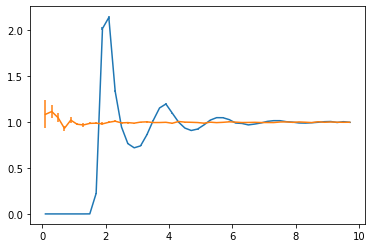

In [37]:
plot_rdf(os.path.join(data_dir, "crowded_rdf.h5"))
plot_rdf(os.path.join(data_dir, "free_rdf.h5"))

Familiarize with the concept of $g(r)$